In [104]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

In [105]:

def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

In [106]:
def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


Let's visualize the 3 figures

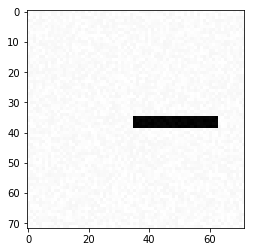

In [107]:

im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


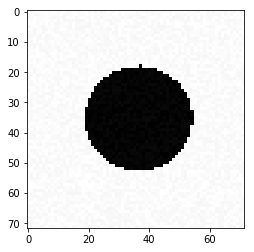

In [108]:
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


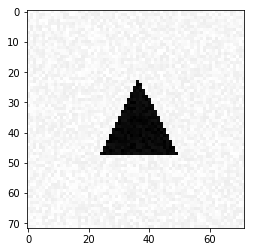

In [109]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


In [110]:

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]


In [111]:
def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(100, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

In [112]:
def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [113]:
import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]


# Problem 3: Simple Classification 
sgd works decreasing the learning rate to 0.001. Adam works perfectly with 10 000 images. Adam works also with 1000 images.

In [269]:
# let's try with sgd


[X_train, Y_train] = generate_dataset_classification(1000, 20)
#sgd doesn't work even with 10 000 images, it works for disk and triangle
#but not rectangle. Not even with cv.. Adam works with 10 000 images.
#Adam works with 1000 images.


Y_train_categ = np_utils.to_categorical(Y_train, 3)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [270]:

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import SGD,Adam
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X_train,Y_train_categ, train_size=0.8)
model = Sequential()
nb_neurons = 1000
model.add(Dense(nb_neurons, input_shape=(5184,)))
model.add(Dense(3,activation='softmax')) #use softmax cause relu is not linear
sgd = SGD(lr=0.001,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd)
model.fit(X_train, Y_train_categ, epochs=65, batch_size=32)


C:\Users\Rebecca\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Epoch 1/65
1000/1000 [==============================] - 16s 16ms/step - loss: 0.1654
Epoch 2/65
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0782
Epoch 3/65
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0570
Epoch 4/65
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0446
Epoch 5/65
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0357
Epoch 6/65
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0295A: 
Epoch 7/65
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0249
Epoch 8/65
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0221
Epoch 9/65
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0199
Epoch 10/65
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0168
Epoch 11/65
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0151
Epoch 12/65
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0

In [271]:

X_test = generate_a_triangle()[0]
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)
np.argmax(model.predict(X_test))
#it works

2

In [272]:

X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)
np.argmax(model.predict(X_test))

#it works as well

1

In [273]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
ys=model.predict(X_test)
np.argmax(model.predict(X_test))

#it works as well

0

In [274]:
[X_test, Y_test] = generate_test_set_classification()
model.evaluate(X_test, Y_test)
score = model.evaluate(X_test, Y_test)
score

Creating data:
0
10
20
30
40
50
60
70
80
90
100/100 [==============================] - 0s 698us/step


0.36356430888175967

In [275]:
#calculate accuracy
counter = 0
for x in range(1000):
    X_test = generate_a_triangle(20,False)[0]
    X_test = X_test.reshape(1, X_test.shape[0])
    X_predict = model.predict(X_test)
    if np.argmax(X_predict) != 2:
        counter = counter + 1

    X_test = generate_a_disk(20,False)
    X_test = X_test.reshape(1, X_test.shape[0])
    X_predict = model.predict(X_test)
    if np.argmax(X_predict) != 1:
        counter = counter + 1

    X_test = generate_a_rectangle(20,False)
    X_test = X_test.reshape(1, X_test.shape[0])
    X_predict = model.predict(X_test)
    if np.argmax(X_predict) != 0:
        counter = counter + 1

accuracy = 1- (counter / 3000)
print("Prediction Accuracy:", accuracy*100, "%")

Prediction Accuracy: 100.0 %


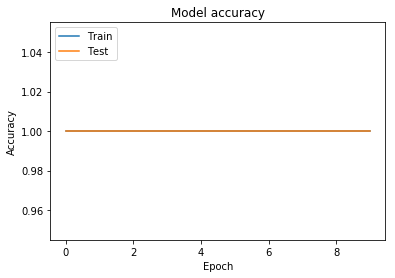

In [276]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


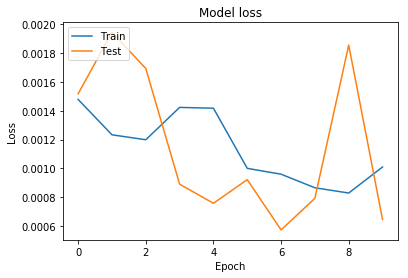

In [277]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#ADAM

In [278]:
[X_train, Y_train] = generate_dataset_classification(1000, 20)



Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [279]:
from keras.models import Sequential
from  keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose,BatchNormalization,Dropout
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import SGD,Adam
#now we create categorical values
Y_train_categ = np_utils.to_categorical(Y_train, 3)

In [283]:
#let's try with adam optimizer
adam=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
from sklearn.model_selection import train_test_split #i tried cross validation but it didn't improve the results for sgd, still it could not predict the rectangle(before decreasing learning rate)

#Testing with adam
model = Sequential()
nb_neurons = 512
model.add(Dense(nb_neurons, input_shape=(5184,)))
model.add(Dense(3,activation='softmax'))
model.compile(loss='mean_squared_error',optimizer=adam,metrics=['accuracy'])
model.fit(X_train, Y_train_categ, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 16s 16ms/step - loss: 0.2075 - acc: 0.5110
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1238 - acc: 0.7500
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0966 - acc: 0.7820
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0720 - acc: 0.9200
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0608 - acc: 0.9330A: 0s - loss: 0.0631 - 
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0491 - acc: 0.9690
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0429 - acc: 0.9640
Epoch 8/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0351 - acc: 0.9870
Epoch 9/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0307 - acc: 0.9920
Epoch 10/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0289 - acc: 0.9830


last loss value 0.0289

In [284]:
#visualize the story of the model
import matplotlib.pyplot as plt
history=model.fit(X_train, Y_train_categ, validation_split=0.25, epochs=10, batch_size=32, verbose=1)


Train on 750 samples, validate on 250 samples
Epoch 1/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0237 - acc: 0.9947 - val_loss: 0.0226 - val_acc: 1.0000
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0217 - acc: 0.9947 - val_loss: 0.0212 - val_acc: 1.0000
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0208 - acc: 0.9947 - val_loss: 0.0196 - val_acc: 1.0000
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0194 - acc: 0.9960 - val_loss: 0.0176 - val_acc: 1.0000
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0171 - acc: 0.9947 - val_loss: 0.0165 - val_acc: 1.0000
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0162 - acc: 0.9973 - val_loss: 0.0152 - val_acc: 1.0000
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0157 - acc: 0.9960 - val_loss: 0.0170 - val_acc: 1.0000
Epoch 8/10
750/750 [==========

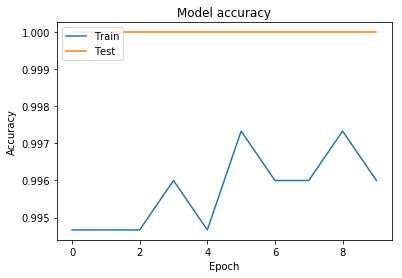

In [285]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


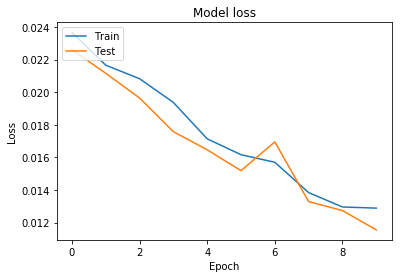

In [286]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [287]:
X_test = generate_a_triangle()[0]
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)
np.argmax(model.predict(X_test))
#it works

2

In [288]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)
np.argmax(model.predict(X_test))
#this also works

1

In [289]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
ys=model.predict(X_test)
np.argmax(model.predict(X_test))
#this also works

0

# 3. Visualizing the weights

In [290]:
#the model we have to use for visualization is a bit different
model = Sequential()
nb_neurons = 1024
model.add(BatchNormalization(input_shape=(IMAGE_SIZE**2,)))
model.add(Dense(nb_neurons, input_shape=(5184,)))
model.add(Dense(3,activation='softmax'))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train, Y_train_categ, epochs=25, batch_size=32)

Epoch 1/25
1000/1000 [==============================] - 20s 20ms/step - loss: 0.2166
Epoch 2/25
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1498
Epoch 3/25
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0921
Epoch 4/25
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0681
Epoch 5/25
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0598
Epoch 6/25
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0343
Epoch 7/25
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0260
Epoch 8/25
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2045
Epoch 9/25
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1975A: 0s - loss: 0
Epoch 10/25
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1836
Epoch 11/25
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1144
Epoch 12/25
1000/1000 [==============================] - 6s 6ms/step

In [291]:
#check the weights
weights=model.get_weights()
weights

[array([1.0265377 , 1.0331203 , 0.9633864 , ..., 0.98484325, 1.0657829 ,
        1.0161371 ], dtype=float32),
 array([-2.0769506e-03,  4.4025786e-05, -9.0621905e-03, ...,
        -1.3528592e-03, -2.0503588e-02, -1.3373671e-02], dtype=float32),
 array([0.9661984 , 0.96572816, 0.96650827, ..., 0.9661145 , 0.9655314 ,
        0.9662877 ], dtype=float32),
 array([0.0004025 , 0.00039873, 0.00038922, ..., 0.00038516, 0.00040513,
        0.00039245], dtype=float32),
 array([[ 0.03409201,  0.00878765, -0.00818134, ...,  0.00231589,
         -0.04505563,  0.04622991],
        [ 0.01913046,  0.00871697, -0.02857177, ..., -0.00731577,
         -0.00794854,  0.04054499],
        [ 0.01691969,  0.00858469,  0.00209466, ...,  0.02176752,
          0.01289333, -0.02431579],
        ...,
        [ 0.0258522 ,  0.03336936, -0.01464455, ..., -0.03320587,
          0.00294695,  0.03750622],
        [ 0.02911572,  0.04826784, -0.03508439, ..., -0.03176706,
         -0.04828241,  0.03404412],
        [-0.0

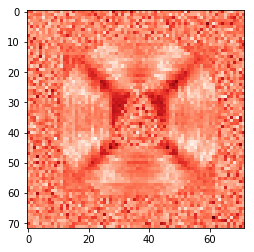

In [292]:
#visualize first column
import matplotlib.pyplot as plt 
import matplotlib.cm as cm #Makes imageplotlib show the images inline #in Jupyter notebooks: 
#Visualization fo first Column
w = model.get_weights()
plt.imshow(w[0].reshape(72,72), cmap=cm.Reds)

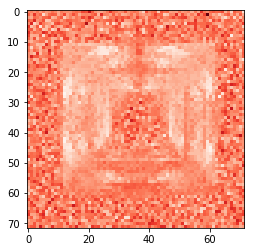

In [293]:
#Visualization of Second  Column
w = model.get_weights()
plt.imshow(w[1].reshape(72,72), cmap=cm.Reds)


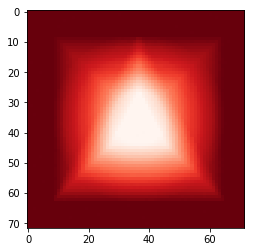

In [294]:
#Visualization of Second  Column
w = model.get_weights()
plt.imshow(w[2].reshape(72,72), cmap=cm.Reds)


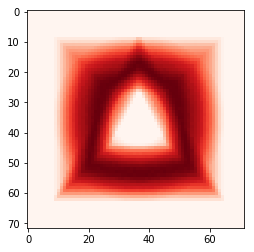

In [295]:
#Visualization of the third Column
w = model.get_weights()
plt.imshow(w[3].reshape(72,72), cmap=cm.Reds)


5 EXERCISE-A More Difficult Classification Problem

In [196]:
#---------------------5 exercise-------------

from keras.layers import Flatten,Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import SGD,Adam
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
from sklearn.model_selection import train_test_split

[X_train, Y_train] = generate_dataset_classification(1000, 20, True)

Y_train_categ = np_utils.to_categorical(Y_train, 3)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [197]:

X_train=X_train.reshape(1000,72,72,1)
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(72,72,1)))  
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Activation("relu"))
print(model.output_shape) 
model.add(Flatten()) 
print(model.output_shape) 
model.add(Dense(3,activation='softmax'))
model.compile(loss='mean_squared_error',optimizer=adam, metrics=['accuracy'])
print(model.output_shape) 
model.fit(X_train, Y_train_categ, epochs=20, batch_size=32)


(None, 34, 34, 16)
(None, 18496)
(None, 3)
Epoch 1/20
1000/1000 [==============================] - 17s 17ms/step - loss: 0.1986 - acc: 0.5330
Epoch 2/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1365 - acc: 0.7040A: 0s - loss: 0.1369 - acc: 
Epoch 3/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1131 - acc: 0.7800
Epoch 4/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0953 - acc: 0.8480
Epoch 5/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0864 - acc: 0.8670
Epoch 6/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0707 - acc: 0.8960
Epoch 7/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0623 - acc: 0.9020
Epoch 8/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0524 - acc: 0.9260A: 1s - loss
Epoch 9/20
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0495 - acc: 0.9270
Epoch 10/20
1000/1000 [===================

In [201]:
#generate test set
[X_test, Y_test] = generate_test_set_classification() 
X_test=X_test.reshape(100,72,72,1)



Creating data:
0
10
20
30
40
50
60
70
80
90


In [202]:
#Evaluate Model
eval_ = model.evaluate(X_test, Y_test)
print('model loss is ',eval_[0], ' and model accuracy is ', eval_[1] )

100/100 [==============================] - 5s 48ms/step
model loss is  0.05365751624107361  and model accuracy is  0.87


In [204]:
import matplotlib.pyplot as plt
history=model.fit(X_train, Y_train_categ, validation_split=0.25, epochs=10, batch_size=32, verbose=1)


Train on 750 samples, validate on 250 samples
Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0142 - acc: 0.9880 - val_loss: 0.0156 - val_acc: 0.9880
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0164 - acc: 0.9933 - val_loss: 0.0158 - val_acc: 0.9920
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0133 - acc: 0.9960 - val_loss: 0.0135 - val_acc: 0.9920
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0115 - acc: 0.9960 - val_loss: 0.0147 - val_acc: 0.9920
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0104 - acc: 0.9973 - val_loss: 0.0160 - val_acc: 0.9880
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0101 - acc: 0.9960 - val_loss: 0.0151 - val_acc: 0.9880
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0085 - acc: 0.9960 - val_loss: 0.0153 - val_acc: 0.9840
Epoch 8/10
750/750 [==========

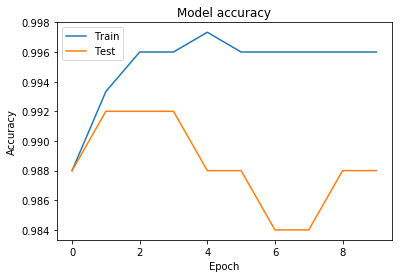

In [205]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

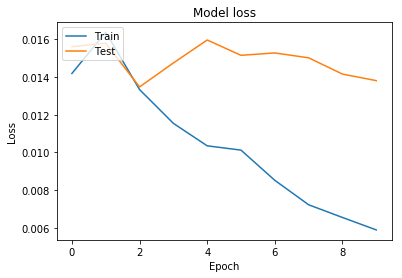

In [206]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 6. Regression Problem

In [216]:
#---------------------6 exercise-REGRESSION-------------

[X_train, Y_train] = generate_dataset_regression(1000, 20)


from keras.layers import Flatten,Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import SGD,Adam
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
from sklearn.model_selection import train_test_split




Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [217]:
X_train=X_train.reshape(1000,72,72,1)#cause 72x72=5184. The problem here is that we cannot give as input a column vector, so we have to reshape it.
#let's sort the values (vertices) in ascending order. here we take the x's
list_1_train=Y_train[:,[0,2,4]]

In [218]:
#same for y's
list_2_train=Y_train[:,[1,3,5]]

In [219]:
for i in range(len(list_1_train)):
    list_1_train[i,], list_2_train[i,] = zip(*sorted(zip(list_1_train[i,], list_2_train[i,])))
    
for i in range(len(list_1_train)):
    for j in range(6):
        if j%2==0:
                a=int(j/2)
                Y_train[i,j]=list_1_train[i,a]
        else:
                b=int((j-1)/2)
                Y_train[i,j]=list_2_train[i,b]    
list_1_train=Y_train[:,[0,2,4]]
list_2_train=Y_train[:,[1,3,5]]

In [220]:
list_1_train[0:5,]

array([[0.04350769, 0.40221658, 0.63090553],
       [0.45270756, 0.53610382, 0.56558926],
       [0.30427429, 0.4155588 , 0.94124257],
       [0.00333847, 0.14278689, 0.81019523],
       [0.23213108, 0.53955152, 0.96364503]])

In [221]:
list_2_train[0:5,]

array([[0.99789394, 0.83161401, 0.05216575],
       [0.20497088, 0.36707018, 0.11660611],
       [0.13616115, 0.8026992 , 0.48243622],
       [0.98263951, 0.74660179, 0.88771838],
       [0.79161694, 0.75326664, 0.73397401]])

In [222]:
#let's create the model 
model = Sequential()
model.add(Conv2D(16,(5,5),activation = 'relu' , input_shape=(72,72,1)))
model.add(Conv2D(16,(5,5),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))
model.add(Conv2D(16,(5,5),activation = 'relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dense(6))
model.compile(loss='mean_squared_error',optimizer=adam,metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=10,batch_size=32)


Epoch 1/10
1000/1000 [==============================] - 31s 31ms/step - loss: 0.0852 - acc: 0.4740
Epoch 2/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0378 - acc: 0.5840
Epoch 3/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0301 - acc: 0.6150
Epoch 4/10
1000/1000 [==============================] - 19s 19ms/step - loss: 0.0245 - acc: 0.6390
Epoch 5/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0207 - acc: 0.6720
Epoch 6/10
1000/1000 [==============================] - 20s 20ms/step - loss: 0.0169 - acc: 0.7070
Epoch 7/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0141 - acc: 0.7400
Epoch 8/10
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0129 - acc: 0.7440
Epoch 9/10
1000/1000 [==============================] - 19s 19ms/step - loss: 0.0109 - acc: 0.7640
Epoch 10/10
1000/1000 [==============================] - 18s 18ms/step - loss: 0.0098 - acc: 0.8020


In [223]:
#generate test set
[X_test, Y_test] = generate_test_set_regression()
X_test = X_test.reshape(np.shape(X_test)[0],72,72,1)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [224]:
#Predict
Y_predict=model.predict(X_test.reshape(np.shape(X_test)[0],72,72,1))    


In [225]:
#Evaluate the model
eval_ = model.evaluate(X_test, Y_test)
print('model loss is ',eval_[0], ' and model accuracy is ', eval_[1] )



300/300 [==============================] - 7s 23ms/step
model loss is  0.10949297606945038  and model accuracy is  0.32666666666666666


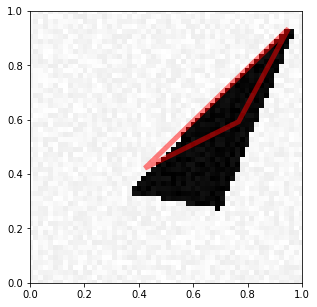

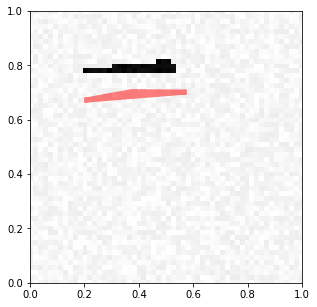

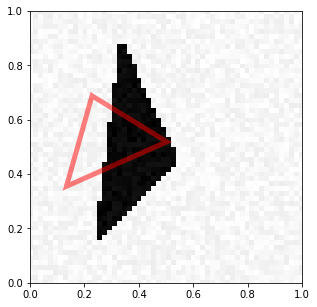

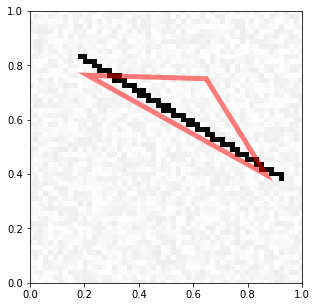

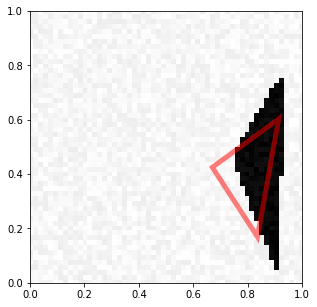

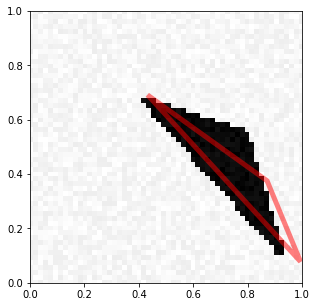

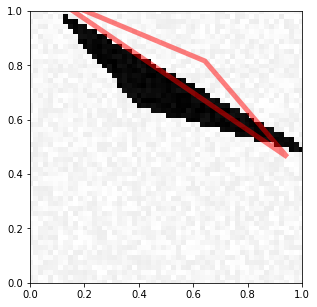

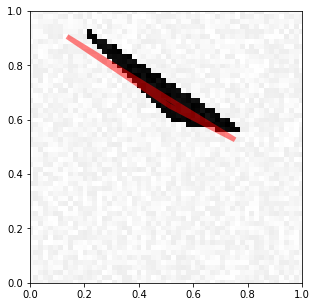

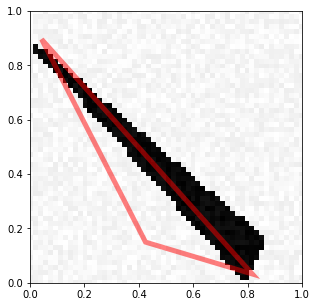

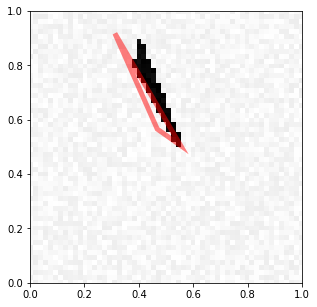

In [226]:
#Visualizing the Regression
for x in range(10):
    visualize_prediction(X_test[x],Y_predict[x])

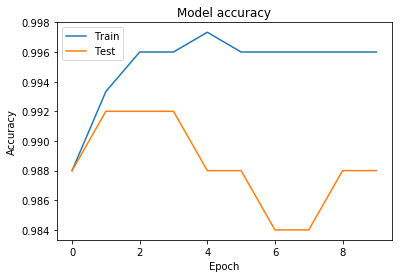

In [228]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

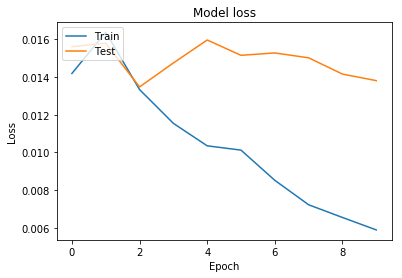

In [229]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Question 7: image denoising 


In [234]:
# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72
import numpy as np
import random
#let's change the functions to return 2 images, with and without noise 
#obect floating state set to false to facilitate training
def generate_random():
    return random.uniform(0, 1)


def generate_a_drawing_pair(figsize, U, V):
    noise = generate_random()*40
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()

    imdata1 = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)

    imdata2 = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata2 = imdata2 + noise * np.random.random(imdata1.size)
    plt.close(fig)

    return imdata1, imdata2 


def generate_a_rectangle_pair(free_location=False):
    noise = generate_random()*100
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_pair(figsize, U, V)



def generate_a_disk_pair(free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_pair(figsize, U, V)


def generate_a_triangle_pair(free_location=False):
    noise = generate_random()*20
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    
    return generate_a_drawing_pair(figsize, U, V)



def generate_dataset_classification_pair(nb_samples, free_location=False):
    # Getting im_size:
    noise = generate_random()
    im_size = np.shape(generate_a_rectangle_pair())[1]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i], Y[i] = generate_a_rectangle_pair(free_location)
        elif category == 1: 
            X[i], Y[i] = generate_a_disk_pair(free_location)
        else:
            X[i], Y[i] = generate_a_triangle_pair(free_location)
    X = (X + noise) / (255 + 2 * noise)   
    Y = Y / 255
    return [X, Y]


def generate_test_set_classification_pair():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification_pair(500, False)
    return [X_test, Y_test]


def visualize_prediction_pair(x):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    plt.show()

In [235]:
#Create training set
[X_train, Y_train] = generate_dataset_classification_pair(5000)
X_train = X_train.reshape(np.shape(X_train)[0],72,72,1)
Y_train = Y_train.reshape(np.shape(X_train)[0],72,72,1)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

Noisy


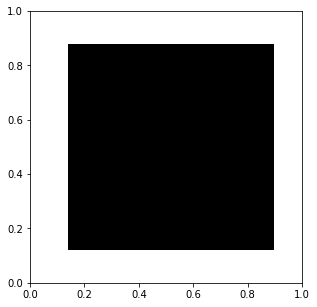

Not Noisy


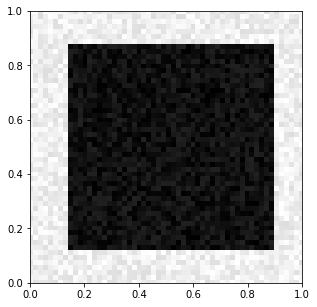

Noisy


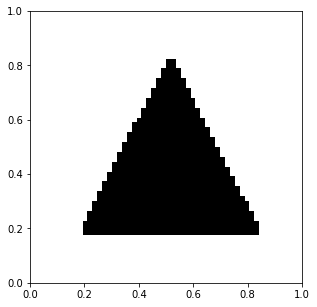

Not Noisy


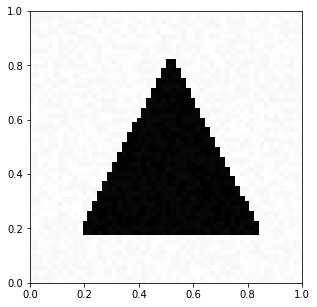

Noisy


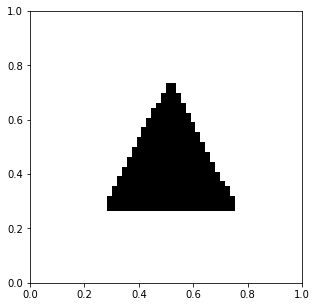

Not Noisy


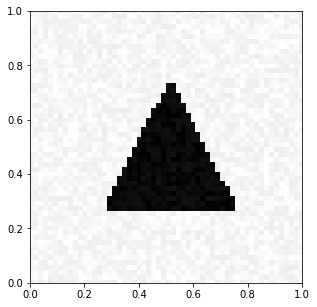

Noisy


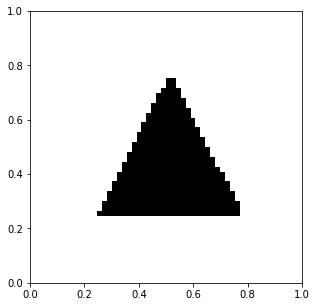

Not Noisy


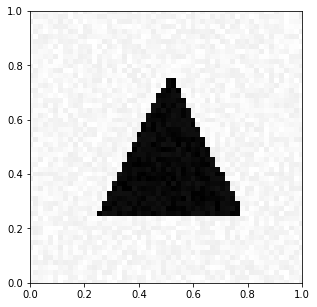

Noisy


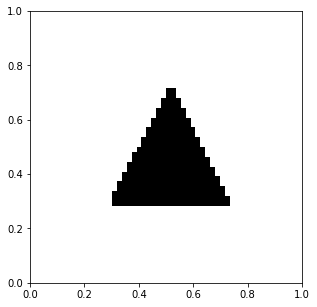

Not Noisy


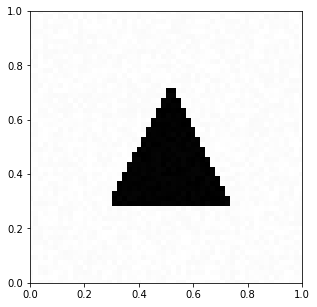

Noisy


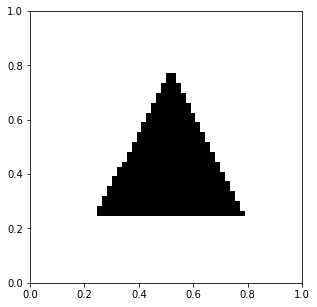

Not Noisy


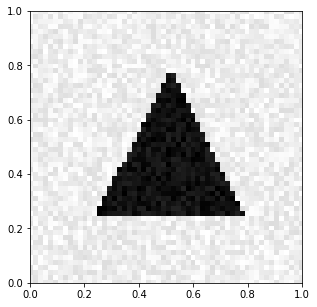

Noisy


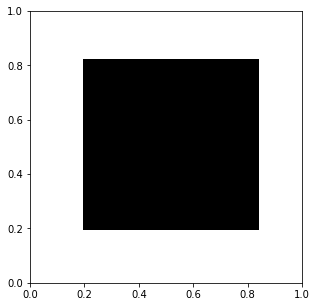

Not Noisy


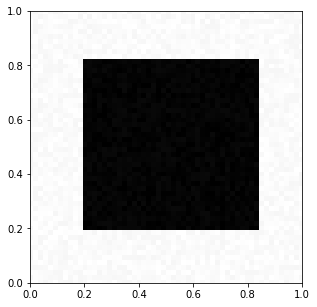

Noisy


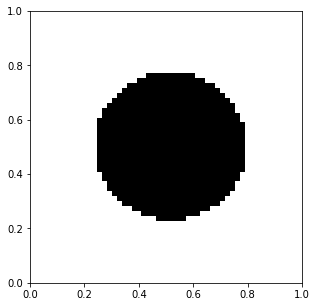

Not Noisy


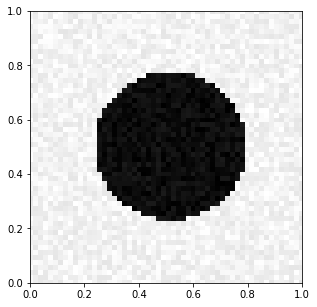

Noisy


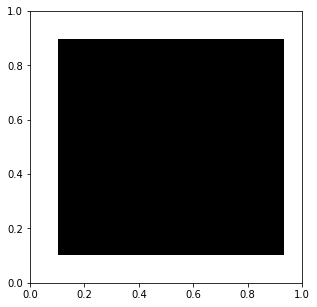

Not Noisy


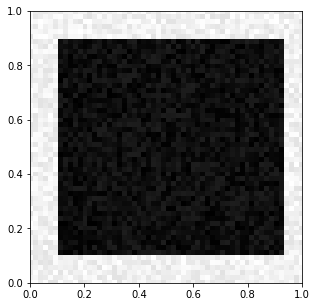

Noisy


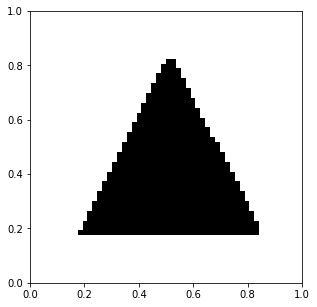

Not Noisy


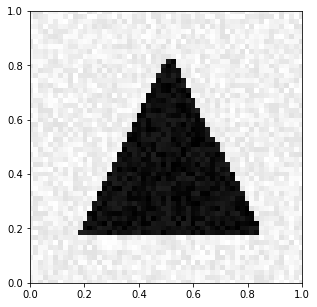

In [236]:
#Visualizing first 10 examples
for i in range(10):
    print('Noisy')
    visualize_prediction_pair(X_train[i])
    print('Not Noisy')
    visualize_prediction_pair(Y_train[i])


In [239]:
#create neural network
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(72,72,1),padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3,3), padding='same'))
model.summary()
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=10,batch_size=32)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 72, 72, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 36, 36, 32)        18464     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 18, 18, 32)        9248      
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 36, 36, 64)        18496     
__________

In [240]:
#create test set
[X_test, Y_test] = generate_test_set_classification_pair()
X_test = X_test.reshape(np.shape(X_test)[0],72,72,1)
Y_test = Y_test.reshape(np.shape(X_test)[0],72,72,1)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


with noise


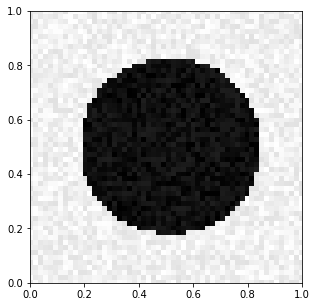

with no noise


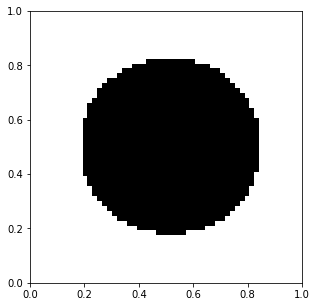

virtual


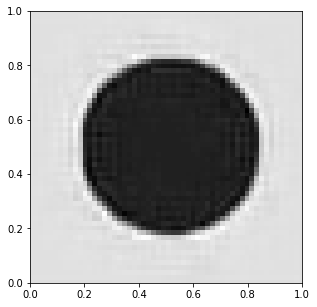

with noise


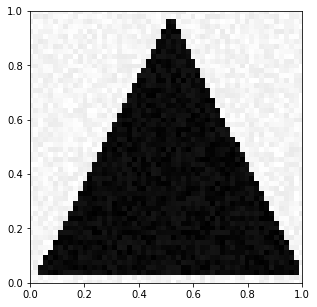

with no noise


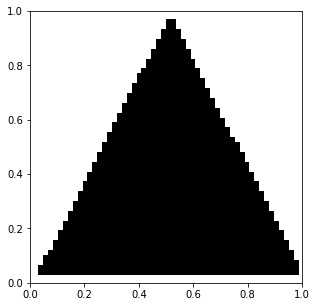

virtual


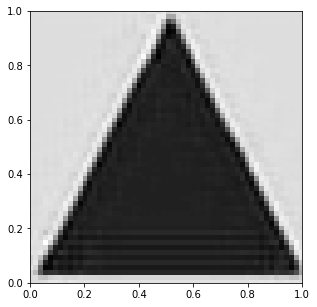

with noise


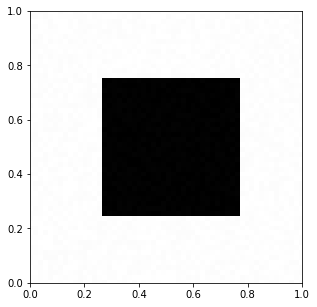

with no noise


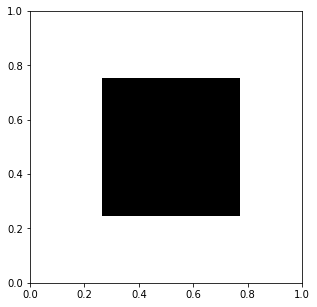

virtual


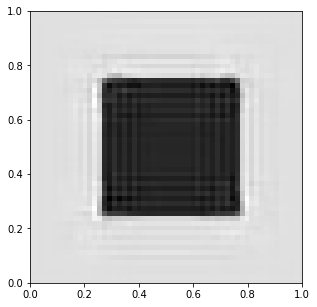

with noise


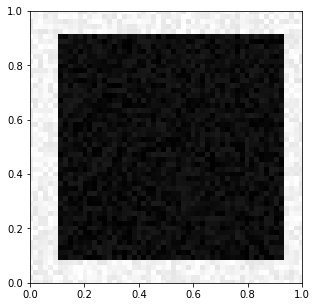

with no noise


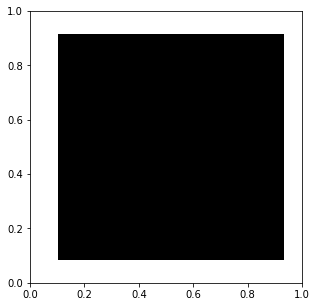

virtual


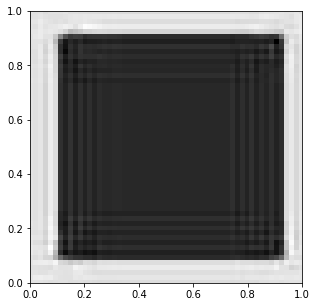

with noise


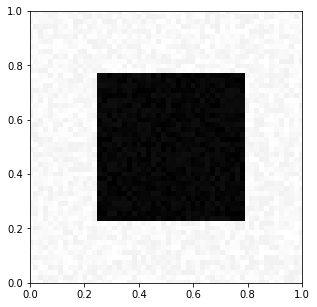

with no noise


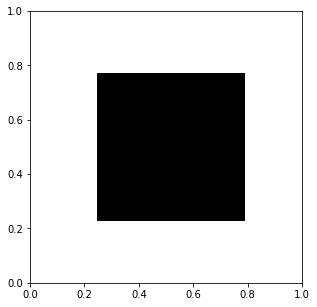

virtual


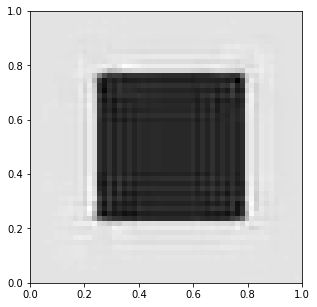

with noise


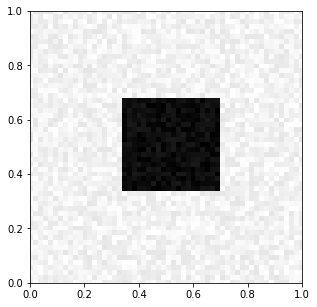

with no noise


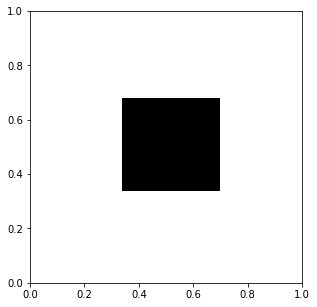

virtual


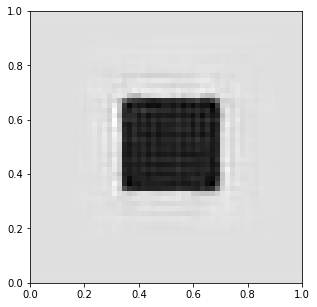

with noise


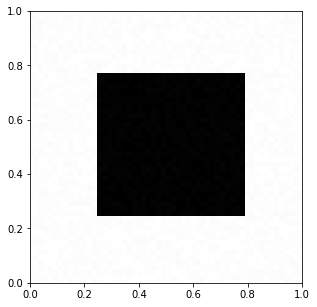

with no noise


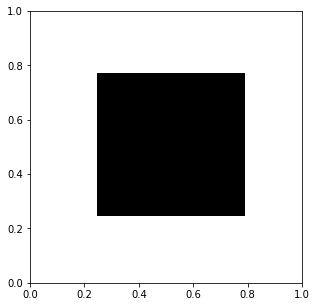

virtual


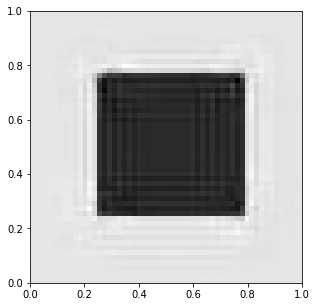

with noise


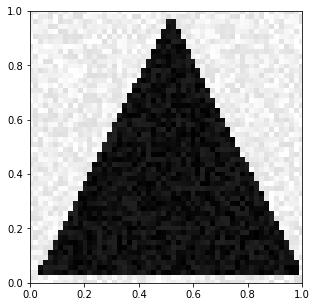

with no noise


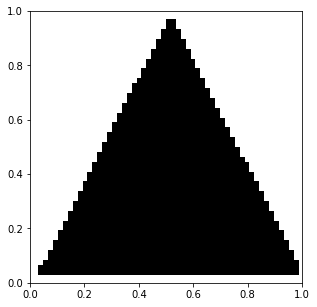

virtual


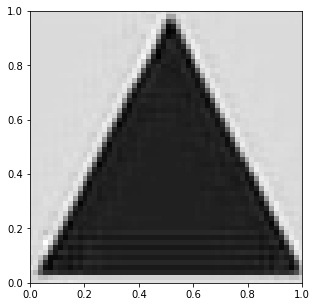

with noise


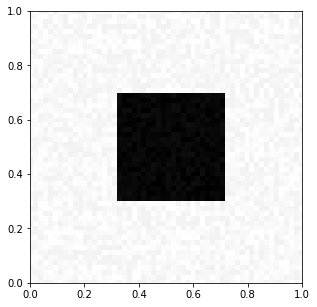

with no noise


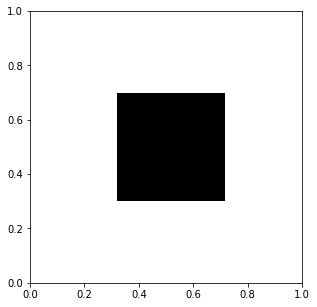

virtual


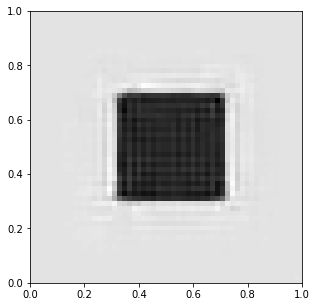

with noise


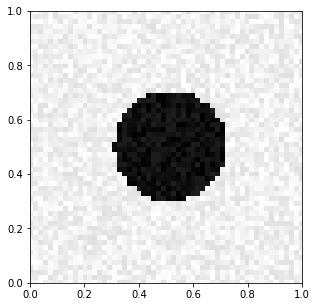

with no noise


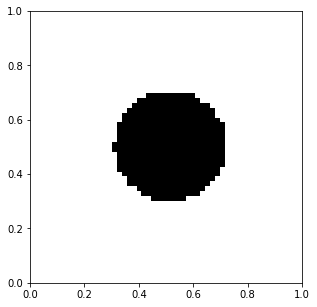

virtual


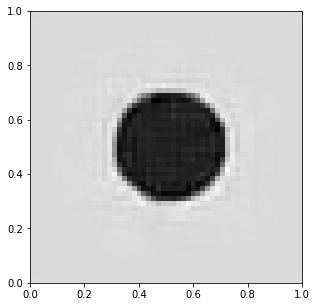

In [242]:
# Visualize Performance
Y_predict = model.predict(X_test)
Y_predict = Y_predict.reshape(np.shape(Y_predict)[0],72,72,1)

for i in range(10):
    print('with noise')
    visualize_prediction_pair(Y_test[i])
    print('with no noise')
    visualize_prediction_pair(X_test[i])
    print('virtual')
    visualize_prediction_pair(Y_predict[i])
